# Airbnb project 

- Katrine Bay s183910, Gustav Larsen s18xxxx, Rasmus Aagaard s164419 and Mathilde Block sxxxxxx.

- Section 1:Introduction + Data analysis and visualization

- Section 2:Prediction Challenge
- Section 3:Exploratory Component
- Section 4:Conclusions

## Introduction

In this project we will be working with data from Airbnb. The data is from the city of Copenhagen, Denmark, and contains information about the listings, the hosts and the reviews. The data is from xxx and can be found on the website [InsideAirbnb](http://insideairbnb.com/get-the-data/).

## Data analysis and visualization

In [14]:
# loading packages etc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [15]:
# read in data
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')

# gz zipped files
calendar_gz = pd.read_csv('data/calendar.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_gz = pd.read_csv('data/listings.csv.gz',compression='gzip',
                   error_bad_lines=False)                   
reviews_gz = pd.read_csv('data/reviews.csv.gz',compression='gzip',
                   error_bad_lines=False)  

# convert to pandas dataframe
listings = pd.DataFrame(listings)
reviews = pd.DataFrame(reviews)
neighbourhoods = pd.DataFrame(neighbourhoods)

calendar_gz = pd.DataFrame(calendar_gz)
listings_gz = pd.DataFrame(listings_gz)
reviews_gz = pd.DataFrame(reviews_gz)

In [16]:
# joining dataframes 
df_reviews = pd.merge(reviews, reviews_gz, on = ['listing_id','date'])
df_listings = pd.merge(listings, listings_gz, on = ['host_id','id'])

In [17]:
# Data preprocessing

# Notice that the variables require some treatment in order to be usable 
# (e.g. Categorical, strings, different scales, etc).

## Prediction Challenge
<span style="color:red">TODO: Comment on confusion matrix, comment on log.reg. coefficients</span>

### Binary Classification
We start off by having a brief look at the data.

In [18]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


In [19]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.381500e+04,1.381500e+04,0.0,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,12170.000000,13815.000000,13815.000000,13815.000000,0.0
mean,1.719385e+17,1.064145e+08,NaN,55.680569,12.557805,1205.878972,4.605574,18.571118,0.903816,4.400651,93.302642,5.451104,NaN
std,2.852538e+17,1.302801e+08,NaN,0.021088,0.033512,1433.143149,16.900153,36.402671,1.110754,21.298565,123.161958,11.373977,NaN
min,6.983000e+03,1.171800e+04,NaN,55.609510,12.435670,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.907962e+07,1.356383e+07,NaN,55.666110,12.540285,729.000000,2.000000,2.000000,0.230000,1.000000,0.000000,0.000000,NaN
50%,3.931542e+07,4.656301e+07,NaN,55.681190,12.555520,995.000000,3.000000,7.000000,0.530000,1.000000,20.000000,3.000000,NaN
75%,5.665348e+17,1.553486e+08,NaN,55.695770,12.580741,1368.500000,4.000000,20.000000,1.120000,1.000000,174.000000,6.000000,NaN
max,7.222925e+17,4.805803e+08,NaN,55.742800,12.651740,64900.000000,1111.000000,711.000000,24.020000,179.000000,365.000000,471.000000,NaN


In [20]:
listings.isna().sum() / listings.count()

id                                0.000000
name                              0.000000
host_id                           0.000000
host_name                         0.000072
neighbourhood_group                    inf
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.135168
reviews_per_month                 0.135168
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
license                                inf
dtype: float64

We immediately notice that `neighbourhood_group` and `license` are missing all values. We will therefore drop these columns.

We'll assume that `id`, `name`, `host_id`, `host_name` and `neighbourhood_group` are irrelevant to our analysis, and therefore drop these columns as well.

We also notice that `last_review` and `reviews_per_month` have the same percentage of missing values. This is because listings with no reviews can't have a value for `last_review` or `reviews_per_month`. We will impute these values with -1.

In [21]:
listings = listings.drop(["id", "name", "host_id", "host_name", "neighbourhood_group", "license", "last_review"], axis=1)
listings[["reviews_per_month"]] = listings[["reviews_per_month"]].fillna(-1)

To deal with categorical features such as `neighbourhood` and `room_type` we will use one-hot encoding.

In [23]:
listings = pd.get_dummies(listings, columns=["neighbourhood", "room_type"])

We will now split the data into a training and test set. The target will be created from the splits such as to avoid data leakage. The targets are created as being higher or lower than the median price. Median price is chosen as the target because it is less sensitive to outliers than mean price, meaning that mean will not necessarily be a good measure of central tendency in "high" and "low" prices.

In [71]:
# split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(listings)
X_train, y_train = train.drop("price", axis=1), (train["price"] > train["price"].median()).astype(int)
X_test, y_test = test.drop("price", axis=1), (test["price"] > test["price"].median()).astype(int)

(0.6734221192819919, 0.6831460674157304)

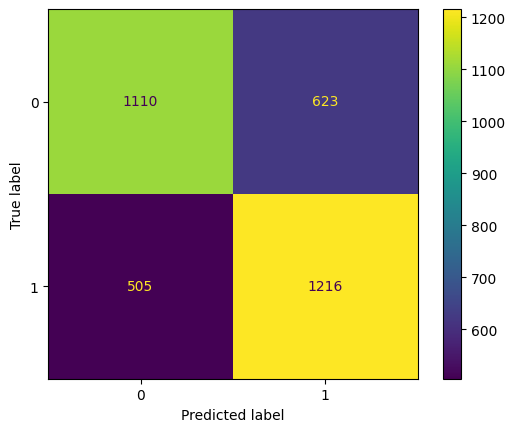

In [ ]:
# train logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# evaluate model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)

In [73]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred), f1_score(y_train, y_pred)

(0.6675996525431908, 0.6749716874292185)

We see that we obtain a test accuracy of 0.67 and an F1-score of 0.68 as well as similar scores on the training set which would indicate that we have not overfitted the to the training set.

### Multiclass Classification

We create the labels such that the price is divided into 3 categories: "Low" (which is to be less than the .33th quantile), "Medium" (which is to be inbetween the 0.33th and 0.66th quantile) and "High" (which is to be larger than the 0.66th quantile). 

As with the binary classification, we split the data first and create labels from the splits' quantiles in order to avoid leakage.

In [107]:
train, test = train_test_split(listings)

def create_targets(prices):
    labels = []
    for price in prices:
        if price < prices.quantile(0.33):
            labels.append("Low")
        if prices.quantile(0.33) <= price <= prices.quantile(0.66):
            labels.append("Medium")
        elif price > prices.quantile(0.66):
            labels.append("High")
    return labels

y_train, y_test = create_targets(train["price"]), create_targets(test["price"])
X_train, X_test = train.drop("price", axis=1), test.drop("price", axis=1)

(0.5005790387955993, 0.493429649652271)

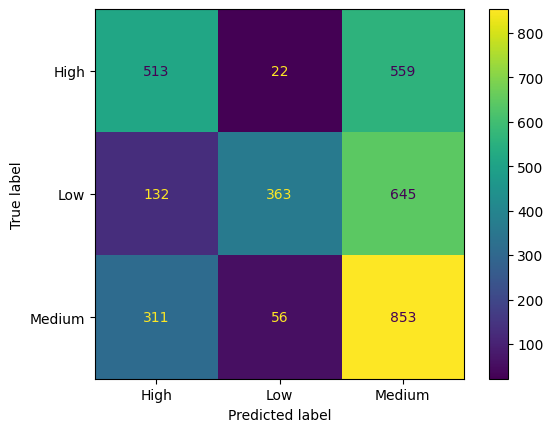

In [109]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test)
accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average="macro")

In [110]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred), f1_score(y_train, y_pred, average="macro")

(0.5127883408937361, 0.5028108667387358)

## Exploratory Component

Figure out something ourselves

## Conclusions
